# Programming Assignment

## CNN classifier for the MNIST dataset

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
gpu_devices = tf.config.experimental.list_physical_devices('GPU')  # only if you have GPU version 
tf.config.experimental.set_memory_growth(gpu_devices[0], True)     # of tensorflow

#### Load and preprocess the data

In [2]:
mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()
train_images = train_images / 255.
test_images = test_images / 255.

In [3]:
train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

In [4]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras import Sequential

In [5]:
"""
Creating model and training
"""
model = Sequential()
model.add(Conv2D(filters=8,kernel_size=(3,3),padding='same',
                    activation='relu',input_shape=train_images[0].shape))
model.add(MaxPooling2D(pool_size=(2,2)))             
model.add(Flatten())             
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
checkpoint_filepath = 'checkpoint_filepath/'

In [18]:
earlyStop = EarlyStopping(patience=3)
checkPoint = ModelCheckpoint(filepath=checkpoint_filepath,save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
model.fit(train_images,train_labels,epochs=50,callbacks=[earlyStop,checkPoint],validation_split=0.2)  
history = model.history  # plot history of training

Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0269 - accuracy: 0.9911 - val_loss: 0.0252 - val_accuracy: 0.9912
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0196 - accuracy: 0.9937 - val_loss: 0.0275 - val_accuracy: 0.9910
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0151 - accuracy: 0.9951 - val_loss: 0.0311 - val_accuracy: 0.9896
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0123 - accuracy: 0.9959 - val_loss: 0.0485 - val_accuracy: 0.9872


#### Plot the learning curves

We will now plot two graphs:
* Epoch vs accuracy
* Epoch vs loss

We will load the model history into a pandas `DataFrame` and use the `plot` method to output the required graphs.

In [21]:
history.history

{'loss': [0.02688729017972946,
  0.019618388265371323,
  0.015071604400873184,
  0.012294044718146324],
 'accuracy': [0.9910833239555359,
  0.9937083125114441,
  0.9950833320617676,
  0.9959375262260437],
 'val_loss': [0.025178009644150734,
  0.027542851865291595,
  0.03108801506459713,
  0.048528727144002914],
 'val_accuracy': [0.9912499785423279,
  0.9909999966621399,
  0.9895833134651184,
  0.9871666431427002]}

In [22]:
# Run this cell to load the model history into a pandas DataFrame

frame = pd.DataFrame(history.history)

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

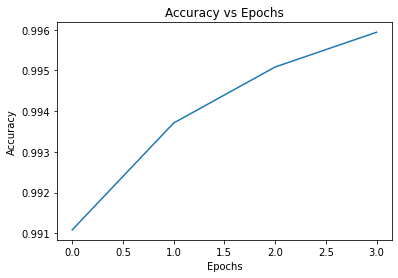

In [23]:
# Run this cell to make the Accuracy vs Epochs plot

acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

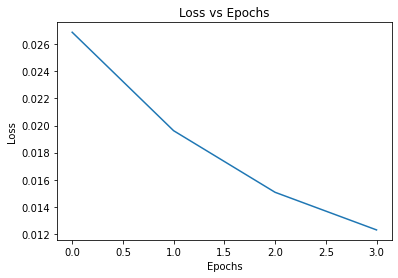

In [24]:
# Run this cell to make the Loss vs Epochs plot

acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

#### Evaluate the model

Finally, you should evaluate the performance of your model on the test set, by calling the model's `evaluate` method.

In [25]:
test_loss, test_accuracy = model.evaluate(test_images,test_labels)    
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0650 - accuracy: 0.9842
Test loss: 0.06498889625072479
Test accuracy: 0.9842000007629395


#### Model predictions

Let's see some model predictions! We will randomly select four images from the test data, and display the image and label for each. 

For each test image, model's prediction (the label with maximum probability) is shown, together with a plot showing the model's categorical distribution.

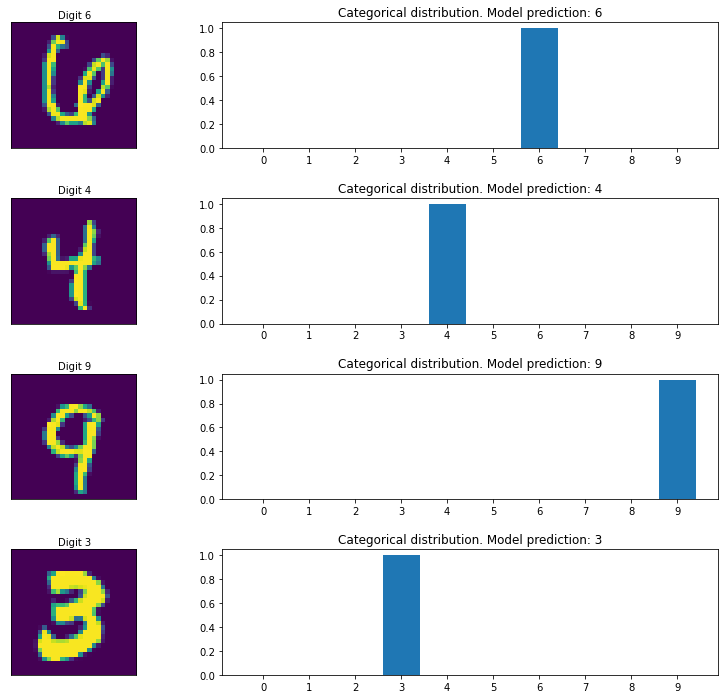

In [27]:
# Run this cell to get model predictions on randomly selected test images

num_test_images = test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()